# Bienvenidos a la 8va práctica de Física Computacional 2024-2 
* Alumna Ayudante: Valentina Santelices
    * Correo: vsantelices2021@udec.cl
* Alumno Ayudante: Juan Ortega
    * Correo: juortega2019@udec.cl

## Leap-frog
Cuando tenemos sistemas de la siguiente forma: 

$$
\ddot{\vec{x}} = \vec{f}(x)
$$

podemos separarlo para asi sea más sencillos nuestros calculos: 

$$
\dot{\vec{x}} = \vec{v}
$$
$$
\dot{\vec{v}} = \vec{f}
$$
Ahora, para aplicar leap-frog realizamos lo siguiente, tomando ideas ya vistas en clases: 

$$
\frac{x(t+\triangle t)-x(t)}{\triangle t} = v(t+\frac{\triangle t}{2})
$$

Despejando tenemos: 

$$
x(t+\triangle t) = x(t) + \triangle t v(t+\frac{\triangle t}{2})
$$

donde 

$$
\frac{v(t+\frac{\triangle t}{2})-v(t-\frac{\triangle t}{2})}{\triangle t} = f(x(t))
$$

$$
v\left(t+\frac{\triangle t}{2}\right) = \left[ v\left(t-\frac{\triangle t}{2}\right) + \frac{\triangle t}{2}f(x(t)) \right] + \frac{\triangle t}{2} f(x(t))
$$


## Simulación del oscilador armónico simple utilizando el método Leapfrog

Este código resuelve numéricamente un **oscilador armónico simple** usando el **método Leapfrog** (también conocido como "Salto de la Rana"). La ecuación diferencial que describe el sistema es:

$$
\frac{d^2 x}{dt^2} + \omega^2 x = 0
$$

### Explicación:

- $x(t)$: Posición del oscilador en el tiempo $t$.
- $ \omega $: Frecuencia angular del sistema (en este caso $ \omega = 3.0 $).
- La ecuación anterior es característica de un **oscilador armónico simple**, que puede modelar el movimiento de un resorte o sistemas similares donde la fuerza es proporcional y opuesta al desplazamiento.


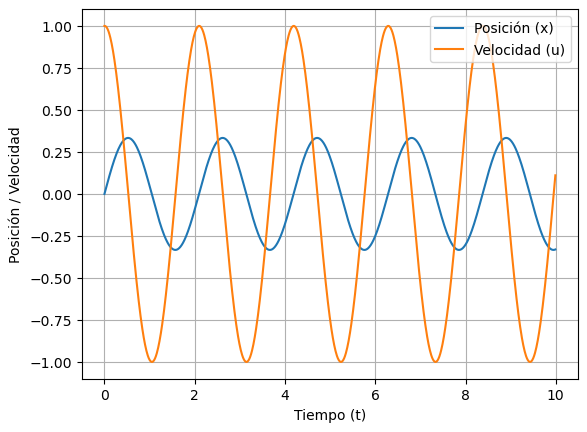

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#Metodo Salto de la Rana

# Función oscilador armónico simple
def f(x, t, w=3.0):
    return -w**2 * x 

# Inicialización de los parámetros
tmax = 10.0
h = 0.01
t = np.arange(0, tmax, h)

x = np.empty(t.size)  # Posición
u = np.empty(t.size)  # Velocidad

# Condiciones iniciales
x[0] = 0.0
v0 = 1.0

# Paso inicial para la velocidad
u[0] = v0 - 0.5*h*f(x[0], t[0])

# Bucle Leapfrog para resolver el sistema
for n in range(t.size-1): #cambiamos el orden de x y u porque necesitamos u[n+1] en x 
    u[n+1] = u[n] + h*f(x=x[n], t=t[n])
    x[n+1] = x[n] + h*u[n+1]

# Gráfica de los resultados
plt.plot(t, x, label="Posición (x)")
plt.plot(t, u, label="Velocidad (u)")
plt.xlabel("Tiempo (t)")
plt.ylabel("Posición / Velocidad")
plt.legend()
plt.grid()
plt.show()


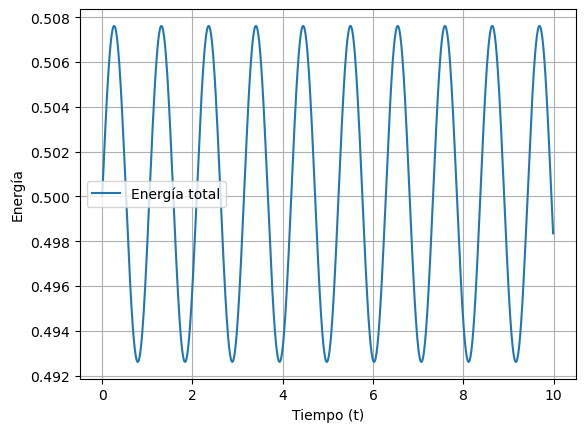

In [4]:
E_kin = 0.5 * u**2
E_pot = 0.5 * (3.0**2) * x**2  # w = 3.0
E_total = E_kin + E_pot

plt.plot(t, E_total, label="Energía total")
plt.xlabel("Tiempo (t)")
plt.ylabel("Energía")
#plt.ylim(0.3,0.6)
plt.legend()
plt.grid()
plt.show()


## Simulación del oscilador de Van der Pol utilizando el método Leapfrog

Este código implementa una **simulación del oscilador de Van der Pol** usando el **método Leapfrog**. La ecuación del oscilador de Van der Pol es:

$$
\frac{d^2 x}{dt^2} - \mu (1 - x^2) \frac{dx}{dt} + x = 0
$$

### Explicación:

- **Osilador de Van der Pol:** Es un sistema no lineal que muestra oscilaciones relajadas, es decir, tiene ciclos periódicos donde la velocidad de cambio varía rápidamente en algunas partes del ciclo y lentamente en otras.
- **$(\mu)$**: Es un parámetro que controla la no linealidad y la intensidad de las oscilaciones. 
  - Si $(\mu > 0)$, aparece un comportamiento oscilatorio con amortiguamiento dependiente del estado.


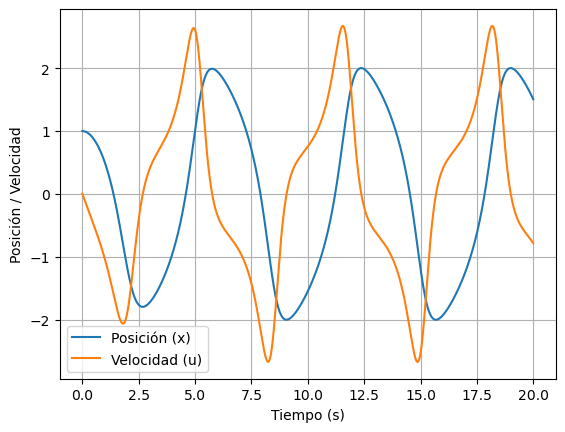

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro de Van der Pol
mu = 1.0

# Función para la aceleración (du/dt)
def f(x, u):
    return -x + mu * (1 - x**2) * u

# Inicialización de los parámetros
tmax = 20.0
h = 0.01
t = np.arange(0, tmax, h)

x = np.empty(t.size)  # Posición
u = np.empty(t.size)  # Velocidad

# Condiciones iniciales
x[0] = 1.0
u[0] = 0.0

# Paso inicial para la velocidad
u[0] -= 0.5 * h * f(x[0], u[0])

# Bucle Leapfrog para resolver el sistema
for n in range(t.size - 1):
    u[n + 1] = u[n] + h * f(x[n], u[n])
    x[n + 1] = x[n] + h * u[n + 1]

# Gráfica de los resultados
plt.plot(t, x, label="Posición (x)")
plt.plot(t, u, label="Velocidad (u)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición / Velocidad")
plt.legend()
plt.grid()
plt.show()


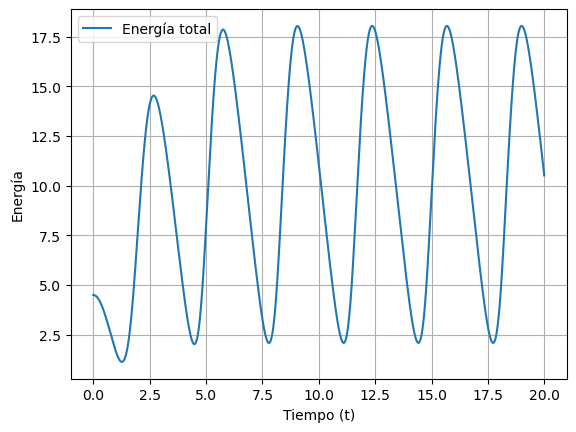

In [17]:
E_kin = 0.5 * u**2
E_pot = 0.5 * (3.0**2) * x**2  # w = 3.0
E_total = E_kin + E_pot

plt.plot(t, E_total, label="Energía total")
plt.xlabel("Tiempo (t)")
plt.ylabel("Energía")
plt.legend()
plt.grid()
plt.show()


## Ecuación del péndulo forzado

La ecuación diferencial que describe el **péndulo forzado amortiguado** es:

$$
\frac{d^2 \theta}{dt^2} + q \frac{d\theta}{dt} + \frac{g}{L} \sin(\theta) = A \cos(\omega t)
$$

### Explicación:

- $ \theta(t) $: Ángulo de desplazamiento del péndulo en función del tiempo.
- $ q $: Coeficiente de amortiguamiento, que representa la pérdida de energía del sistema debido a la fricción o resistencia del aire.
- $ \frac{g}{L} $: Frecuencia natural del péndulo, donde \(g\) es la aceleración gravitacional y \(L\) es la longitud de la cuerda.
- $ A \cos(\omega t) $: Fuerza impulsora periódica, donde:
  - $A$ es la **amplitud** de la fuerza externa.
  - $ \omega $ es la **frecuencia** de la fuerza externa.

### Comportamiento del sistema:

- **Si el amortiguamiento $q$ es bajo** y la amplitud de la fuerza externa $A$ es suficientemente alta, el sistema puede exhibir **comportamiento caótico**.
- Este modelo es un ejemplo clásico de un **sistema no lineal**, ya que la función $\sin(\theta)$ introduce no linealidad, lo que puede resultar en oscilaciones complejas y a veces impredecibles.


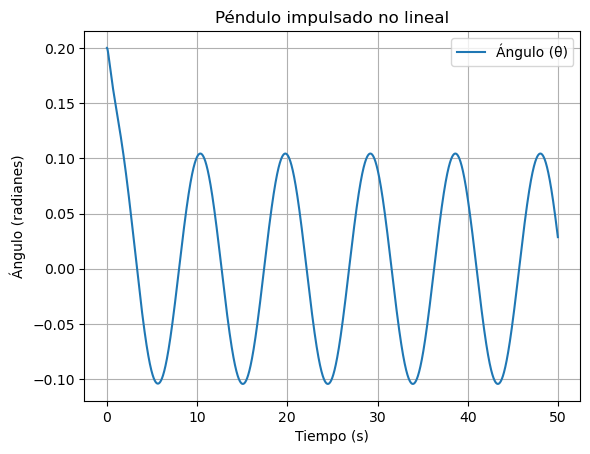

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
g = 9.81  # gravedad (m/s^2)
L = 1.0   # longitud del péndulo (m)
q = 10.0   # coeficiente de amortiguamiento
A = 1.2   # amplitud de la fuerza externa
omega_drive = 2/3  # frecuencia de la fuerza externa

# Definimos la aceleración del sistema con la fuerza externa
def f(theta, omega, t):
    return - (g / L) * np.sin(theta) - q * omega + A * np.cos(omega_drive * t)

# Inicialización de los parámetros
tmax = 50.0  # Simulación más larga para observar caos
h = 0.01
t = np.arange(0, tmax, h)

theta = np.empty(t.size)  # Ángulo
omega = np.empty(t.size)  # Velocidad angular

# Condiciones iniciales
theta[0] = 0.2  # Ángulo inicial pequeño
omega[0] = 0.0  # Velocidad angular inicial

# Paso inicial para la velocidad angular
omega[0] -= 0.5 * h * f(theta[0], omega[0], 0)

# Bucle Leapfrog para resolver el sistema
for n in range(t.size - 1):
    omega[n + 1] = omega[n] + h * f(theta[n], omega[n], t[n])
    theta[n + 1] = theta[n] + h * omega[n + 1]

# Aseguramos que los ángulos estén en el rango [-pi, pi] para evitar desbordamiento
theta = (theta + np.pi) % (2 * np.pi) - np.pi

# Gráfica del resultado
plt.plot(t, theta, label="Ángulo (θ)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (radianes)")
plt.title("Péndulo impulsado no lineal")
plt.grid()
plt.legend()
plt.show()


## Como ejemplo adicional veremos la ecuación de onda 2D

La **ecuación de onda 2D** es una ecuación diferencial parcial que describe la propagación de ondas en dos dimensiones. Su forma general es:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

### Descripción de los términos:
- $(u(x, y, t))$: Es el desplazamiento de la onda en el punto $((x, y))$ en el tiempo $(t)$.
- $(c)$: Es la **velocidad de propagación** de la onda en el medio.
- $(\frac{\partial^2 u}{\partial t^2})$: Es la segunda derivada de $(u)$ con respecto al tiempo, que representa la aceleración del desplazamiento.
- $(\frac{\partial^2 u}{\partial x^2})$ y $(\frac{\partial^2 u}{\partial y^2})$: Son las segundas derivadas espaciales en las direcciones \(x\) y \(y\), que representan la curvatura o variación espacial de la onda.

### Aplicaciones:
La ecuación de onda 2D se usa para modelar fenómenos físicos como:
- Ondas en una superficie líquida.
- Vibraciones en membranas o placas elásticas.
- Propagación de ondas acústicas en el aire o materiales sólidos.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import imageio

# Parámetros físicos y del sistema
L = 1.0       # Longitud del sistema
dx = 0.01     # Paso espacial
c = 1.0       # Velocidad de la onda

# Paso de tiempo para cumplir la condición CFL (estabilidad numérica)
dt = 0.707 * dx / c  

# Crear la malla 2D
x = np.arange(0, L + dx, dx)
y = np.arange(0, L + dx, dx)
xx, yy = np.meshgrid(x, y)  # Malla de puntos en 2D

npts = len(x)  # Número de puntos espaciales
nsteps = 300   # Número de pasos temporales

# Inicializar la matriz 3D para almacenar los estados (pasado, presente, futuro)
f = np.zeros((npts, npts, 3))

# Definir el pulso inicial como una campana gaussiana
xc, w = 0.5, 0.05  # Centro y ancho del pulso
f[:, :, 0] = np.exp(-((xx - xc)**2 + (yy - xc)**2) / w**2)  # Condición inicial

# Lista para almacenar los frames de la animación
frames = []

# Primer paso: Usar el estado inicial para calcular el estado en t + Δt
f[1:-1, 1:-1, 1] = f[1:-1, 1:-1, 0] + \
    0.5 * (c * dt / dx)**2 * (
        f[:-2, 1:-1, 0] + f[2:, 1:-1, 0] - 2 * f[1:-1, 1:-1, 0] +
        f[1:-1, :-2, 0] + f[1:-1, 2:, 0] - 2 * f[1:-1, 1:-1, 0]
    )

# Bucle principal para los siguientes pasos (Leapfrog)
for k in range(nsteps):
    # Calcular el siguiente estado en t + Δt
    f[1:-1, 1:-1, 2] = -f[1:-1, 1:-1, 0] + 2 * f[1:-1, 1:-1, 1] + \
        (c * dt / dx)**2 * (
            f[:-2, 1:-1, 1] + f[2:, 1:-1, 1] - 2 * f[1:-1, 1:-1, 1] +
            f[1:-1, :-2, 1] + f[1:-1, 2:, 1] - 2 * f[1:-1, 1:-1, 1]
        )

    # Actualizar los estados para el siguiente ciclo
    f[:, :, 0] = f[:, :, 1]  # El presente se convierte en pasado
    f[:, :, 1] = f[:, :, 2]  # El futuro se convierte en presente

    # Guardar los frames cada 10 pasos
    if k % 10 == 0:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.plot_surface(xx, yy, f[:, :, 2], cmap=cm.coolwarm, edgecolor='none')
        ax.set_title(f'Tiempo: {k * dt:.2f} s')
        ax.set_zlim(-0.25, 1.0)

        # Guardar el frame en la lista de imágenes
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(image)
        plt.close(fig)

# Crear el GIF a partir de los frames
gif_path = "simulacion/onda_2d.gif"
imageio.mimsave(gif_path, frames, fps=5)

gif_path


/tmp/ipykernel_5012/1049251279.py:62: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


'simulacion/onda_2d.gif'

## Recomendación: 
<img src="imagenes/final_wave.jpg" alt="sf1" width="500"/>
